# Ghouls, Goblins, and Ghosts... Boo!

In [1]:
# 데이터 분석
import pandas as pd
import numpy as np
import random as rnd

# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 기계 학습
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
# 데이터 로딩
train_df = pd.read_csv('./projectData/train.csv')
test_df = pd.read_csv('./projectData/test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['id' 'bone_length' 'rotting_flesh' 'hair_length' 'has_soul' 'color'
 'type']


In [4]:
# preview the data
train_df.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             371 non-null    int64  
 1   bone_length    371 non-null    float64
 2   rotting_flesh  371 non-null    float64
 3   hair_length    371 non-null    float64
 4   has_soul       371 non-null    float64
 5   color          371 non-null    object 
 6   type           371 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 17.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             529 non-null    int64  
 1   bone_length    529 non-null    float64
 2   rotting_flesh  529 non-null    float64
 3   hair_length    529 non-null    float64
 4   has_soul       529 non-

In [6]:
train_df.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


In [7]:
train_df.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

In [8]:
test_df.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
dtype: int64

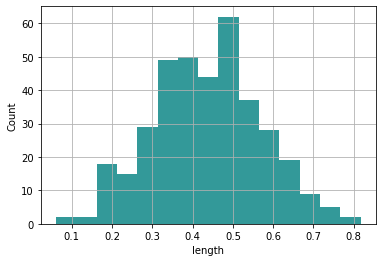

In [9]:
ax = train_df["bone_length"].hist(bins=15, color='teal', alpha=0.8)
ax.set(xlabel='length', ylabel='Count')
plt.show()

# 데이터 전처리

In [10]:
# color 와 type 을 새로운 카테고리 속성으로 만들어서 train_df3에 저장
train_df2 = pd.get_dummies(train_df, columns=["type"])
train_df3 = pd.get_dummies(train_df2, columns=["color"])

# 결과 확인
train_df3.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,type_Ghost,type_Ghoul,type_Goblin,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0,0.354512,0.350839,0.465761,0.781142,0,1,0,0,0,0,1,0,0
1,1,0.575560,0.425868,0.531401,0.439899,0,0,1,0,0,0,0,1,0
2,2,0.467875,0.354330,0.811616,0.791225,0,1,0,1,0,0,0,0,0
3,4,0.776652,0.508723,0.636766,0.884464,0,1,0,1,0,0,0,0,0
4,5,0.566117,0.875862,0.418594,0.636438,1,0,0,0,0,0,0,1,0


In [11]:
# 일단 id 만 삭제처리했는데 이후에 color 도 삭제해도 될 것 같기도...
#train_df3.drop('id', axis=1, inplace=True)
#train_df3.head()

In [12]:
#train 에서 진행한 것들 test 에도 적용
test_df2 = pd.get_dummies(train_df, columns=["type"])
test_df3 = pd.get_dummies(train_df2, columns=["color"])

#id 값은 결과 확인을 위해 남겨두기
#train_df3.drop('id', axis=1, inplace=True)

test_df3.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,type_Ghost,type_Ghoul,type_Goblin,color_black,color_blood,color_blue,color_clear,color_green,color_white
0,0,0.354512,0.350839,0.465761,0.781142,0,1,0,0,0,0,1,0,0
1,1,0.575560,0.425868,0.531401,0.439899,0,0,1,0,0,0,0,1,0
2,2,0.467875,0.354330,0.811616,0.791225,0,1,0,1,0,0,0,0,0
3,4,0.776652,0.508723,0.636766,0.884464,0,1,0,1,0,0,0,0,0
4,5,0.566117,0.875862,0.418594,0.636438,1,0,0,0,0,0,0,1,0


# Machine Learning 을 이용한 Ghost 그룹 예측

In [35]:
# 우선 학습 집합과 테스트 집합을 준비한다.
X_train_ghost = train_df3.drop("type_Ghost", axis=1)
Y_train_ghost = train_df3["type_Ghost"]
X_test_ghost = test_df3.drop("id", axis=1).copy()
X_train_ghost.shape, Y_train_ghost.shape, X_test_ghost.shape

((371, 13), (371,), (371, 13))

# Support Vector Machine

In [26]:
# SVM 모델 학습
svc = SVC()
svc.fit(X_train_ghost, Y_train_ghost)

SVC()

In [27]:
# 테스트 데이터에 대해 예측
Y_pred_svc = svc.predict(X_test_ghost)
# 테스트 데이터를 현재 레이블이 없으므로 학습 데이터에 대해 예측한 정확도 측정
acc_svc = round(svc.score(X_train_ghost, Y_train_ghost) * 100, 2)
acc_svc

68.46

# Logistic Regression

In [28]:
# Logistic Regression training
logreg = LogisticRegression()
logreg.fit(X_train_ghost, Y_train_ghost)

c:\users\subin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# Logistic Regression prediction
Y_pred_logreg = logreg.predict(X_test_ghost)
acc_log = round(logreg.score(X_train_ghost, Y_train_ghost) * 100, 2)
acc_log

100.0

# K-Nearest Neighbor

In [30]:
knn  = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_ghost, Y_train_ghost)
Y_pred_knn = knn.predict(X_test_ghost)
acc_knn = round(knn.score(X_train_ghost, Y_train_ghost) * 100, 2)
acc_knn

77.36

# Naive Bayes classifiers

In [31]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train_ghost, Y_train_ghost)
Y_pred_NB = gaussian.predict(X_test_ghost)
acc_gaussian = round(gaussian.score(X_train_ghost, Y_train_ghost) * 100, 2)
acc_gaussian

100.0

# Decision Tree

In [32]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_ghost, Y_train_ghost)
Y_pred_DT = decision_tree.predict(X_test_ghost)
acc_decision_tree = round(decision_tree.score(X_train_ghost, Y_train_ghost) * 100, 2)
acc_decision_tree

100.0

# Artificial Neural Network

In [33]:
ANN = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(10, 30), random_state=1)
ANN.fit(X_train_ghost, Y_train_ghost)
Y_pred_ANN = ANN.predict(X_test_ghost)
acc_ANN = round(ANN.score(X_train_ghost, Y_train_ghost) * 100, 2)
acc_ANN

c:\users\subin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


100.0

# 최종결과 저장

In [34]:
Y_pred = Y_pred_DT

submission = pd.DataFrame({
        "id": test_df3["id"],
        "Ghost": Y_pred
    })
submission.to_csv('./projectData/Ghostsubmission.csv', index=False)

# Machine Learning 을 이용한 Ghoul 그룹 예측

In [46]:
# 우선 학습 집합과 테스트 집합을 준비한다.
X_train_ghoul = train_df3.drop("type_Ghoul", axis=1)
Y_train_ghoul = train_df3["type_Ghoul"]
X_test_ghoul = test_df3.drop("id", axis=1).copy()
X_train_ghoul.shape, Y_train_ghoul.shape, X_test_ghoul.shape

((371, 13), (371,), (371, 13))

# Support Vector Machine

In [47]:
# SVM 모델 학습
svc = SVC()
svc.fit(X_train_ghoul, Y_train_ghoul)

SVC()

In [48]:
# 테스트 데이터에 대해 예측
Y_pred_svc = svc.predict(X_test_ghoul)
# 테스트 데이터를 현재 레이블이 없으므로 학습 데이터에 대해 예측한 정확도 측정
acc_svc = round(svc.score(X_train_ghoul, Y_train_ghoul) * 100, 2)
acc_svc

65.23

# Logistic Regression

In [49]:
# Logistic Regression training
logreg = LogisticRegression()
logreg.fit(X_train_ghoul, Y_train_ghoul)

c:\users\subin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# K-Nearest Neighbor

In [50]:
# Logistic Regression prediction
Y_pred_logreg = logreg.predict(X_test_ghoul)
acc_log = round(logreg.score(X_train_ghoul, Y_train_ghoul) * 100, 2)
acc_log

100.0

# Naive Bayes classifiers

In [51]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train_ghoul, Y_train_ghoul)
Y_pred_NB = gaussian.predict(X_test_ghoul)
acc_gaussian = round(gaussian.score(X_train_ghoul, Y_train_ghoul) * 100, 2)
acc_gaussian

100.0

# Decision Tree

In [52]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_ghoul, Y_train_ghoul)
Y_pred_DT = decision_tree.predict(X_test_ghoul)
acc_decision_tree = round(decision_tree.score(X_train_ghoul, Y_train_ghoul) * 100, 2)
acc_decision_tree

100.0

# Artificial Neural Network

In [53]:
ANN = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(10, 30), random_state=1)
ANN.fit(X_train_ghost, Y_train_ghoul)
Y_pred_ANN = ANN.predict(X_test_ghoul)
acc_ANN = round(ANN.score(X_train_ghoul, Y_train_ghoul) * 100, 2)
acc_ANN

c:\users\subin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


33.69

# 최종결과 저장

In [56]:
Y_pred = Y_pred_logreg

submission = pd.DataFrame({
        "id": test_df3["id"],
        "Ghoul": Y_pred
    })
submission.to_csv('./projectData/Ghoulsubmission.csv', index=False)

# Machine Learning 을 이용한 Goblin 그룹 예측

In [58]:
# 우선 학습 집합과 테스트 집합을 준비한다.
X_train_goblin = train_df3.drop("type_Goblin", axis=1)
Y_train_goblin = train_df3["type_Goblin"]
X_test_goblin = test_df3.drop("id", axis=1).copy()
X_train_goblin.shape, Y_train_goblin.shape, X_test_goblin.shape

((371, 13), (371,), (371, 13))

# Support Vector Machine

In [60]:
# SVM 모델 학습
svc = SVC()
svc.fit(X_train_goblin, Y_train_goblin)

SVC()

In [61]:
# 테스트 데이터에 대해 예측
Y_pred_svc = svc.predict(X_test_goblin)
# 테스트 데이터를 현재 레이블이 없으므로 학습 데이터에 대해 예측한 정확도 측정
acc_svc = round(svc.score(X_train_goblin, Y_train_goblin) * 100, 2)
acc_svc

66.31

# Logistic Regression

In [63]:
# Logistic Regression training
logreg = LogisticRegression()
logreg.fit(X_train_goblin, Y_train_goblin)

c:\users\subin\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# K-Nearest Neighbor

In [65]:
# Logistic Regression prediction
Y_pred_logreg = logreg.predict(X_test_goblin)
acc_log = round(logreg.score(X_train_goblin, Y_train_goblin) * 100, 2)
acc_log

100.0

# Naive Bayes classifiers

In [67]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train_goblin, Y_train_goblin)
Y_pred_NB = gaussian.predict(X_test_goblin)
acc_gaussian = round(gaussian.score(X_train_goblin, Y_train_goblin) * 100, 2)
acc_gaussian

99.46

# Decision Tree

In [69]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_ghoul, Y_train_goblin)
Y_pred_DT = decision_tree.predict(X_test_goblin)
acc_decision_tree = round(decision_tree.score(X_train_goblin, Y_train_goblin) * 100, 2)
acc_decision_tree

31.54

# Artificial Neural Network

In [71]:
ANN = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(10, 30), random_state=1)
ANN.fit(X_train_ghost, Y_train_goblin)
Y_pred_ANN = ANN.predict(X_test_goblin)
acc_ANN = round(ANN.score(X_train_goblin, Y_train_goblin) * 100, 2)
acc_ANN

66.31

# 최종결과 저장

In [55]:
Y_pred = Y_pred_logreg

submission = pd.DataFrame({
        "id": test_df3["id"],
        "Goblin": Y_pred
    })
submission.to_csv('./projectData/Goblinsubmission.csv', index=False)